In [1]:
from helpers import * 

from four_complete import *
from four_complete_locations import *
from graph_checks import *

from canonical_order import *

from canonical_order_kant import *

In [2]:
bottom_data = get_saved_graph_data("BOTTOM")
side_data = get_saved_graph_data()

graph_data = bottom_data

In [3]:
f = FourComplete(graph_data)
f.get_boundary_cyle()
f.generate_dividing_indices()
f.divide_boundary_cycle()
f.ensure_no_cips()
f.paths

b = BoundaryCycle(copy.deepcopy(graph_data))
locs = FourCompleteLocations(copy.deepcopy(graph_data), f.boundary, f.paths, b.boundary_line_string)
locs.run()
locs.connect_outer_nodes() 

ic| o: 1, direction: <CardinalDirections.SOUTH: 0>, ix: 10
ic| o: 2, direction: <CardinalDirections.WEST: 1>, ix: 11
ic| o: 3, direction: <CardinalDirections.NORTH: 2>, ix: 12
ic| o: 0, direction: <CardinalDirections.EAST: 3>, ix: 9


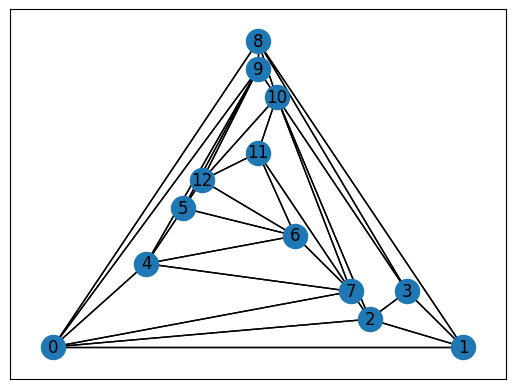

In [4]:
ae = check_planarity(locs.G)
plot_planar(ae)

In [5]:
k = KantCanonicalOrder(locs.data)
k.initialize_order()

In [6]:
show_graph_attributes(k.G)

("Node 0: {'data': NodeCanonicalOrder({'index': 0, 'order': -99, 'mark': "
 "False, 'visited': 0, 'chords': 0})}")
("Node 1: {'data': NodeCanonicalOrder({'index': 1, 'order': -99, 'mark': "
 "False, 'visited': 0, 'chords': 0})}")
("Node 2: {'data': NodeCanonicalOrder({'index': 2, 'order': -99, 'mark': "
 "False, 'visited': 0, 'chords': 0})}")
("Node 3: {'data': NodeCanonicalOrder({'index': 3, 'order': -99, 'mark': "
 "False, 'visited': 0, 'chords': 0})}")
("Node 4: {'data': NodeCanonicalOrder({'index': 4, 'order': -99, 'mark': "
 "False, 'visited': 0, 'chords': 0})}")
("Node 5: {'data': NodeCanonicalOrder({'index': 5, 'order': -99, 'mark': "
 "False, 'visited': 0, 'chords': 0})}")
("Node 6: {'data': NodeCanonicalOrder({'index': 6, 'order': -99, 'mark': "
 "False, 'visited': 0, 'chords': 0})}")
("Node 7: {'data': NodeCanonicalOrder({'index': 7, 'order': -99, 'mark': "
 "False, 'visited': 0, 'chords': 0})}")
("Node 8: {'data': NodeCanonicalOrder({'index': 8, 'order': -99, 'mark': "
 "Fal

In [7]:
def get_node_data(node_index):
    data:NodeCanonicalOrder = k.G.nodes[node_index]["data"]
    return data

In [8]:
# pick a vertex 
def check_vertex_criteria(node_index):
    data = get_node_data(node_index)
    if data.mark == False:
        if data.visited >= 2:
            if data.chords == 0:
                if data.order != 1 and data.order != 2:
                    return True

In [9]:
def update_neighbors(node_index):
    nbs = [nb for nb in k.G.neighbors(node_index)]
    ic(nbs)
    for nb in nbs:
        data = get_node_data(nb)
        data.update_visited()

In [10]:
vk = k.vn # TODO: for loop 
for node_index in k.G.nodes:
    if check_vertex_criteria(node_index):
        ic(node_index)
        data = get_node_data(node_index)
        data.add_node_to_order(vk)
        
        update_neighbors(node_index)

        break

ic| node_index: 12
ic| nbs: [6, 5, 9, 11, 10]


In [11]:
# chords .. 
# (1) find the subgraph induced by V - {u in V where Mark(u) is true}

# find such u 
marked_nodes = []
for node_index in k.G.nodes:
    data = get_node_data(node_index)
    if data.mark == True:
        marked_nodes.append(node_index)

# get the subgraph 
unmarked_nodes = set(k.G.nodes).difference(set(marked_nodes))
G_diff = nx.subgraph(k.G, unmarked_nodes)


# get the external face of the subgraph 


In [12]:
marked_nodes, G_diff.nodes

([12], NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11)))

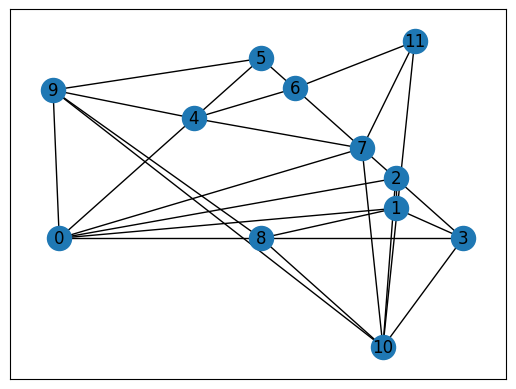

In [13]:
plot_planar(G_diff, k.embed)

In [19]:
temp_graph_data  = GraphData(G_diff, k.embed)
b = BoundaryCycle(temp_graph_data) #TODO why is None being returned ?
b.ccw_boundary_cycle

None


[8, 10, 3, 2, 11, 6, 5, 9, 0]

In [21]:
alt_drawing = check_planarity(G_diff)
alt_embed = nx.planar_layout(alt_drawing)
alt_embed

{0: array([ 0.6       , -0.25833333]),
 1: array([0.3       , 0.04166667]),
 2: array([-0.1       , -0.05833333]),
 3: array([0.1       , 0.14166667]),
 4: array([-0.8       , -0.35833333]),
 5: array([-1.        , -0.45833333]),
 6: array([0.        , 0.54166667]),
 7: array([-0.6       , -0.15833333]),
 8: array([0.2       , 0.24166667]),
 9: array([ 1.        , -0.45833333]),
 10: array([0.2       , 0.34166667]),
 11: array([0.1       , 0.44166667])}

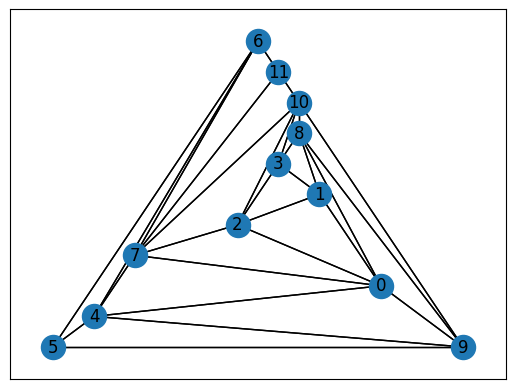

In [15]:
plot_planar(alt_drawing)

In [22]:
temp_graph_data  = GraphData(G_diff, alt_embed)
b = BoundaryCycle(temp_graph_data) #TODO why is None being returned ?
b.ccw_boundary_cycle

None


[10, 11, 6, 5, 9]

In [18]:
show_graph_attributes(k.G)

("Node 0: {'data': NodeCanonicalOrder({'index': 0, 'order': -99, 'mark': "
 "False, 'visited': 0, 'chords': 0})}")
("Node 1: {'data': NodeCanonicalOrder({'index': 1, 'order': -99, 'mark': "
 "False, 'visited': 0, 'chords': 0})}")
("Node 2: {'data': NodeCanonicalOrder({'index': 2, 'order': -99, 'mark': "
 "False, 'visited': 0, 'chords': 0})}")
("Node 3: {'data': NodeCanonicalOrder({'index': 3, 'order': -99, 'mark': "
 "False, 'visited': 0, 'chords': 0})}")
("Node 4: {'data': NodeCanonicalOrder({'index': 4, 'order': -99, 'mark': "
 "False, 'visited': 0, 'chords': 0})}")
("Node 5: {'data': NodeCanonicalOrder({'index': 5, 'order': -99, 'mark': "
 "False, 'visited': 1, 'chords': 0})}")
("Node 6: {'data': NodeCanonicalOrder({'index': 6, 'order': -99, 'mark': "
 "False, 'visited': 1, 'chords': 0})}")
("Node 7: {'data': NodeCanonicalOrder({'index': 7, 'order': -99, 'mark': "
 "False, 'visited': 0, 'chords': 0})}")
("Node 8: {'data': NodeCanonicalOrder({'index': 8, 'order': -99, 'mark': "
 "Fal